In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly

In [2]:
def make_df_from_tournament(tournament_url, npages, string):
    
    ''' This function realizes a dataframe from a single tournament url that has many rounds in different pages 
        
        ETER_PARAMETERS:
        
            (string) tournament_url : url of the tournament in html or csv;
            
            (int) npages : number of pages the tournament has inside which there are all matches;
            
            (string) string : string added by default on tournament url in the searchbar by the browser when you change 
                              page to get other matches of the same tournament.
                              
        RETURNS:
        
            (pandas_object) df : pandas dataframe already concatenated.
            
    '''
    
    n_of_pages = np.arange(0, npages*100, 100) 
    # make sure the browser added 100 to the page number
    
    tournament_list = []
    for i in range(len(n_of_pages)):
        if i == 0:
            tournament_list.append(pd.DataFrame(pd.read_html(tournament_url)[3]))
        else:
            tournament_list.append(pd.DataFrame(pd.read_html(tournament_url + string + str(n_of_pages[i]))[1]))
    
    df = pd.concat(tournament_list)
    
    return df

list_of_data = ['https://www.365chess.com/tournaments/World_Blitz_2019_2019/43856',
               'https://www.365chess.com/tournaments/30th_Cracovia_Open_A_2019/43861',
                'https://www.365chess.com/tournaments/World_Rapid_2019_2019/43853']
pages = [22, 3, 16]
make_df_from_tournament('https://www.365chess.com/tournaments/World_Blitz_2019_2019/43856', 22, "/?p=1&start=")

,White,Black,Result,Round,Date,Opening,View
0,"Nakamura, H","Bosiocic, M",1-0,1.100,"Dec 29, 2019",A06 Reti opening,NaN
1,"Socko, B","Giri, A",½-½,1.100,"Dec 29, 2019",A56 Benoni defence,NaN
2,"Al Ghamdi, A","Utegaliyev, A",0-1,1.100,"Dec 29, 2019",B01 Scandinavian (centre counter) defence,NaN
3,"Kezin, R","Masrahi, A",1-0,1.101,"Dec 29, 2019",A50 Queen's pawn game,NaN
4,"Al Thebaiti, A","Alekseenko, K",0-1,1.102,"Dec 29, 2019",A45 Queen's pawn game,NaN
...,...,...,...,...,...,...,...
55,"Tsoi, D","Mamatov, M",1-0,21.950,"Dec 30, 2019",A03 Bird's opening,NaN
56,"Thing, B","Gukesh D,",0-1,21.960,"Dec 30, 2019","B22 Sicilian, Alapin's variation (2.c3)",NaN
57,"Potapov, P","Al Ghamdi, A",1-0,21.970,"Dec 30, 2019",C55 Two knights defence,NaN
58,"Usov, A","Yagupov, I",0-1,21.980,"Dec 30, 2019",B40 Sicilian defence,NaN


In [3]:
def reading(list_of_t, npages, string_variable):
    
    ''' Function that scroll through each pages of the tournament in order to take track of each match
    
        ENTER PARAMETERS :
        
                    (list) list_of_t : is a list of tournaments;
                    
                    (int) npages : number of pages that tournament has;
                    
                    (str) string_variable : string to add to the url when you go from page 1 to 2, 3 and so on.
                    
        RETURNS :
                    (pandas_df) df_fin : final DataFrame already concatenated.
            
    '''
    
    for i in range(len(list_of_t)):
        df = make_df_from_tournament(list_of_t[i], npages[i], strings)
        if i==0:
            df_fin = df
        else:
            df_fin=pd.concat([df_fin,df])
    return df_fin

list_of_data = ['https://www.365chess.com/tournaments/World_Blitz_2019_2019/43856',
               'https://www.365chess.com/tournaments/30th_Cracovia_Open_A_2019/43861',
                'https://www.365chess.com/tournaments/World_Rapid_2019_2019/43853',
               'https://www.365chess.com/tournaments/2nd_Citta_di_Imola_Open_2019/43824']
pages = [22, 3, 16,1]
strings ="/?p=1&start="
dataframe_all = reading(list_of_data, pages, strings)

In [4]:
dataframe_all

,White,Black,Result,Round,Date,Opening,View
0,"Nakamura, H","Bosiocic, M",1-0,1.100,"Dec 29, 2019",A06 Reti opening,NaN
1,"Socko, B","Giri, A",½-½,1.100,"Dec 29, 2019",A56 Benoni defence,NaN
2,"Al Ghamdi, A","Utegaliyev, A",0-1,1.100,"Dec 29, 2019",B01 Scandinavian (centre counter) defence,NaN
3,"Kezin, R","Masrahi, A",1-0,1.101,"Dec 29, 2019",A50 Queen's pawn game,NaN
4,"Al Thebaiti, A","Alekseenko, K",0-1,1.102,"Dec 29, 2019",A45 Queen's pawn game,NaN
...,...,...,...,...,...,...,...
45,"Dudin, G","Rombaldoni, D",1-0,5.500,"Dec 08, 2019","A34 English, symmetrical variation",NaN
46,"Collutiis, D","Gilevych, A",½-½,5.600,"Dec 08, 2019",A13 English opening,NaN
47,"Lazic, M","Napoli, N",1-0,5.700,"Dec 08, 2019","A07 Reti, King's Indian attack (Barcza system)",NaN
48,"Brancaleoni, M","Tomba, I",1-0,5.800,"Dec 08, 2019","D13 Queen's Gambit Declined Slav, exchange var...",NaN


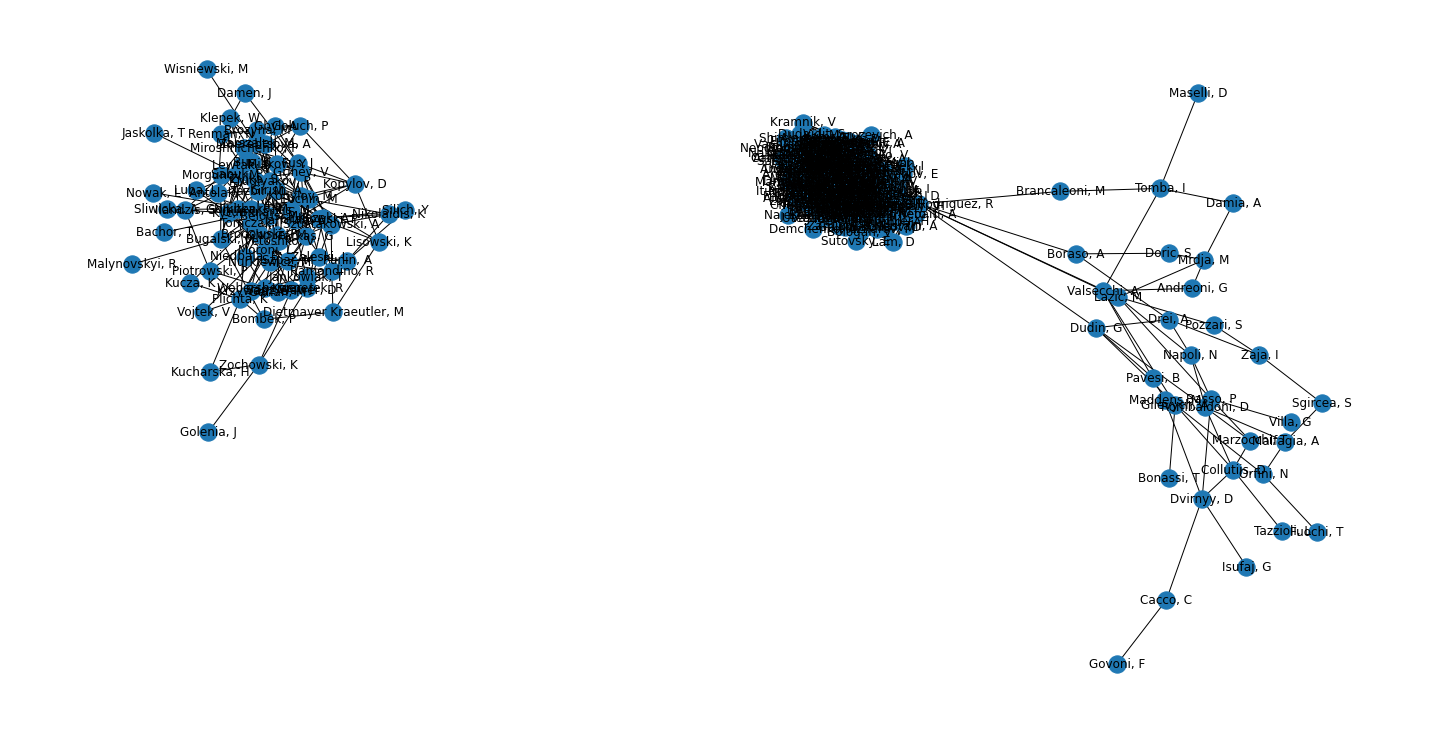

In [10]:
A = nx.from_pandas_edgelist(dataframe_all, source='White', target='Black')
plt.figure(figsize=(20,10))
nx.draw(A, with_labels=True)

In [11]:
pager = nx.pagerank(A)
pager

{'Nakamura, H': 0.0031084126542643116,
 'Bosiocic, M': 0.00334915666496287,
 'Socko, B': 0.00342246636132678,
 'Giri, A': 0.0032680870589105702,
 'Al Ghamdi, A': 0.002831331469319363,
 'Utegaliyev, A': 0.0032642259142675904,
 'Kezin, R': 0.0034486722639576854,
 'Masrahi, A': 0.0026886098246155232,
 'Al Thebaiti, A': 0.002253370257823729,
 'Alekseenko, K': 0.0034339989306735466,
 'Le, Q': 0.0032493350193922976,
 'Inarkiev, E': 0.0033495545938772775,
 'Kobalia, M': 0.003277723042114468,
 'Vachier Lagrave, M': 0.003088213536538143,
 'Andriasian, Z': 0.0033452459202017145,
 'Rakhmanov, A': 0.003337231864412267,
 'Krsnik Cohar, I': 0.0032102685640392013,
 'Vidit, S': 0.003244500943196644,
 'Zubov, A': 0.003258570925087417,
 'Shcherbakov, R': 0.0032047444703954707,
 'Huzman, A': 0.00326699030235066,
 'Kramnik, V': 0.002191861981327762,
 'Grischuk, A': 0.003333463164204413,
 'Ruck, R': 0.0033727367562326836,
 'Iljiushenok, I': 0.003322932227591724,
 'Dubov, D': 0.0032937443554966863,
 'Korobo

<AxesSubplot:ylabel='Count'>

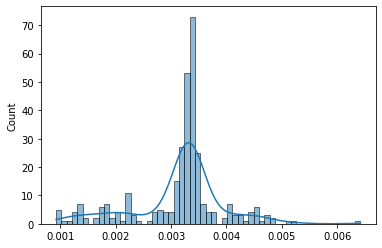

In [12]:
sns.histplot(pager, kde=True)

In [13]:
dataframe_all.drop('View', axis=1)

,White,Black,Result,Round,Date,Opening
0,"Nakamura, H","Bosiocic, M",1-0,1.100,"Dec 29, 2019",A06 Reti opening
1,"Socko, B","Giri, A",½-½,1.100,"Dec 29, 2019",A56 Benoni defence
2,"Al Ghamdi, A","Utegaliyev, A",0-1,1.100,"Dec 29, 2019",B01 Scandinavian (centre counter) defence
3,"Kezin, R","Masrahi, A",1-0,1.101,"Dec 29, 2019",A50 Queen's pawn game
4,"Al Thebaiti, A","Alekseenko, K",0-1,1.102,"Dec 29, 2019",A45 Queen's pawn game
...,...,...,...,...,...,...
45,"Dudin, G","Rombaldoni, D",1-0,5.500,"Dec 08, 2019","A34 English, symmetrical variation"
46,"Collutiis, D","Gilevych, A",½-½,5.600,"Dec 08, 2019",A13 English opening
47,"Lazic, M","Napoli, N",1-0,5.700,"Dec 08, 2019","A07 Reti, King's Indian attack (Barcza system)"
48,"Brancaleoni, M","Tomba, I",1-0,5.800,"Dec 08, 2019","D13 Queen's Gambit Declined Slav, exchange var..."


In [14]:
# How to find items

def how_find(df_colum, name):
    i=df[df[df_colum]==name]
    return i 

In [15]:
rank = pd.DataFrame(pd.read_excel(r"C:\Users\checc\OneDrive\Desktop\classifica.xlsx"))
rank

,Player,ELO,Pts
0,"GM Carlsen, Magnus",2872,16.5
1,"GM Nakamura, Hikaru",2736,16.5
2,"GM Kramnik, Vladimir",2753,15.0
3,"GM Vachier Lagrave, Maxime",2780,14.0
4,"GM Matlakov, Maxim",2699,14.0
...,...,...,...
201,"Miranda Neto, Jaime Amorim",2102,4.0
202,"CM Masrahi, Abdulrahman A",1956,4.0
203,"FM Al Nhier, Hamoud",1934,4.0
204,"CM Al Thebaiti, Ahmed M",1976,3.5


In [19]:
df = pd.DataFrame(pd.read_html('https://www.365chess.com/tournaments/World_Blitz_2019_2019/43856')[3])
df

,White,Black,Result,Round,Date,Opening,View
0,"Nakamura, H","Bosiocic, M",1-0,1.100,"Dec 29, 2019",A06 Reti opening,NaN
1,"Socko, B","Giri, A",½-½,1.100,"Dec 29, 2019",A56 Benoni defence,NaN
2,"Al Ghamdi, A","Utegaliyev, A",0-1,1.100,"Dec 29, 2019",B01 Scandinavian (centre counter) defence,NaN
3,"Kezin, R","Masrahi, A",1-0,1.101,"Dec 29, 2019",A50 Queen's pawn game,NaN
4,"Al Thebaiti, A","Alekseenko, K",0-1,1.102,"Dec 29, 2019",A45 Queen's pawn game,NaN
...,...,...,...,...,...,...,...
95,"Esipenko, A","Zarubitski, V",1-0,1.930,"Dec 29, 2019","D12 Queen's Gambit Declined Slav, 4.e3 Bf5",NaN
96,"Miranda Neto, J","Yuffa, D",0-1,1.940,"Dec 29, 2019",A46 Queen's pawn game,NaN
97,"Golubov, S","Tsvetkov, A",1-0,1.950,"Dec 29, 2019",D02 Queen's pawn game,NaN
98,"Tengis, T","Bologan, V",1-0,1.960,"Dec 29, 2019","E63 King's Indian, fianchetto, Panno variation",NaN


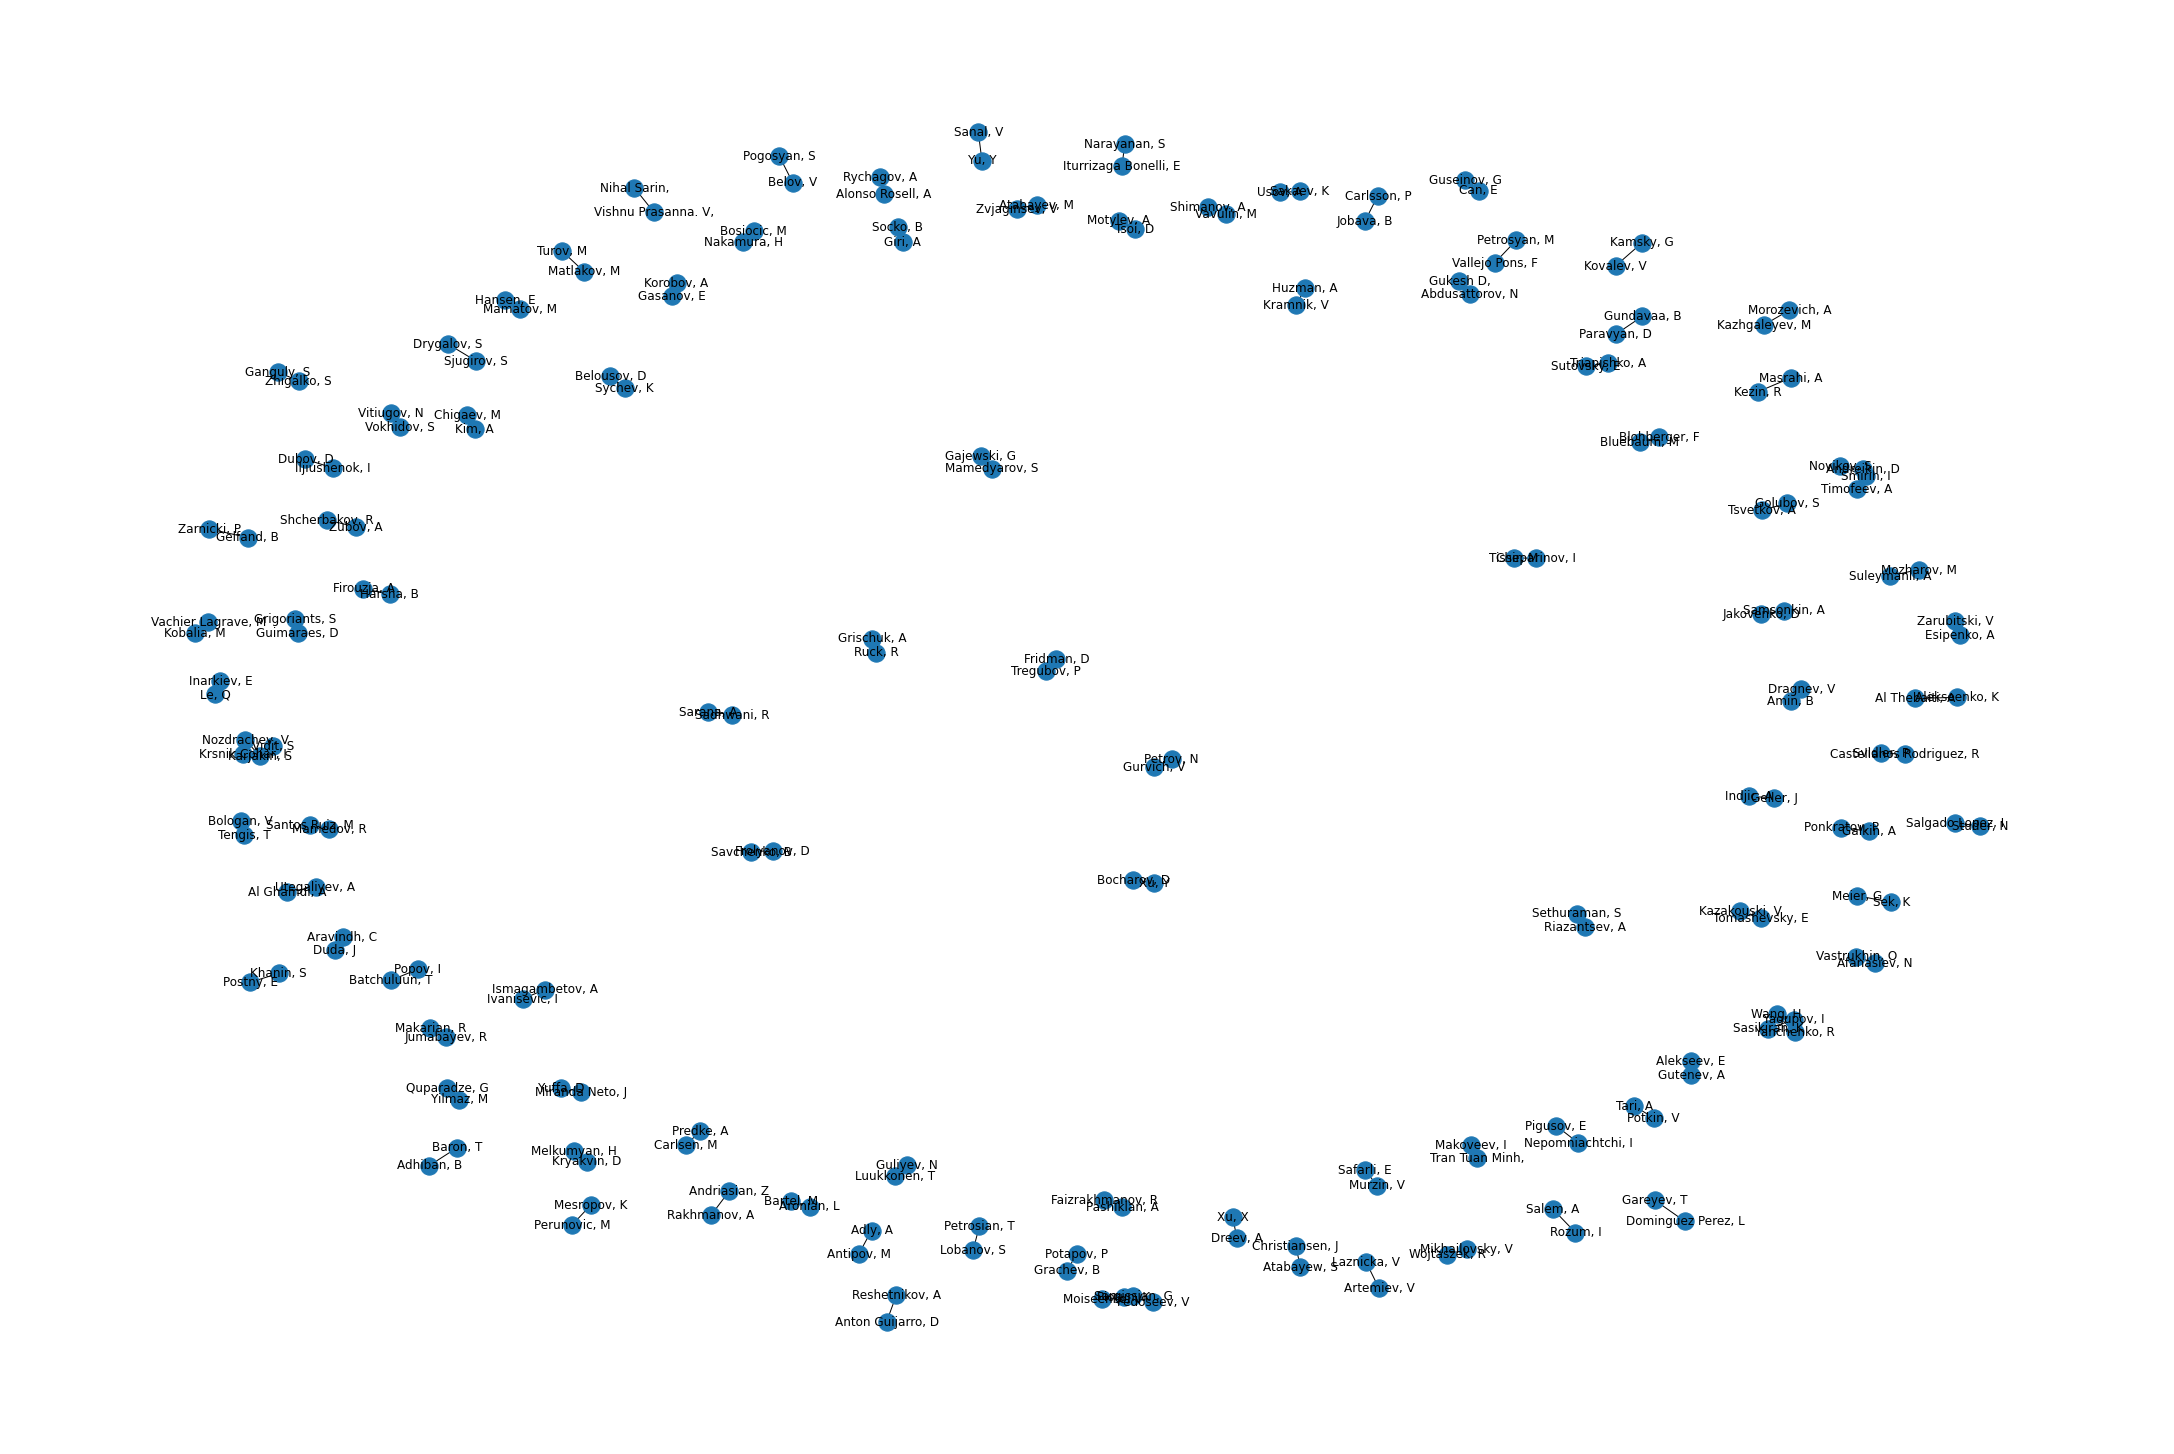

In [20]:
G = nx.from_pandas_edgelist(df, source='White', target='Black')
fig = plt.figure(figsize=(30,20))
nx.draw(G, with_labels=True)

C:\Users\checc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


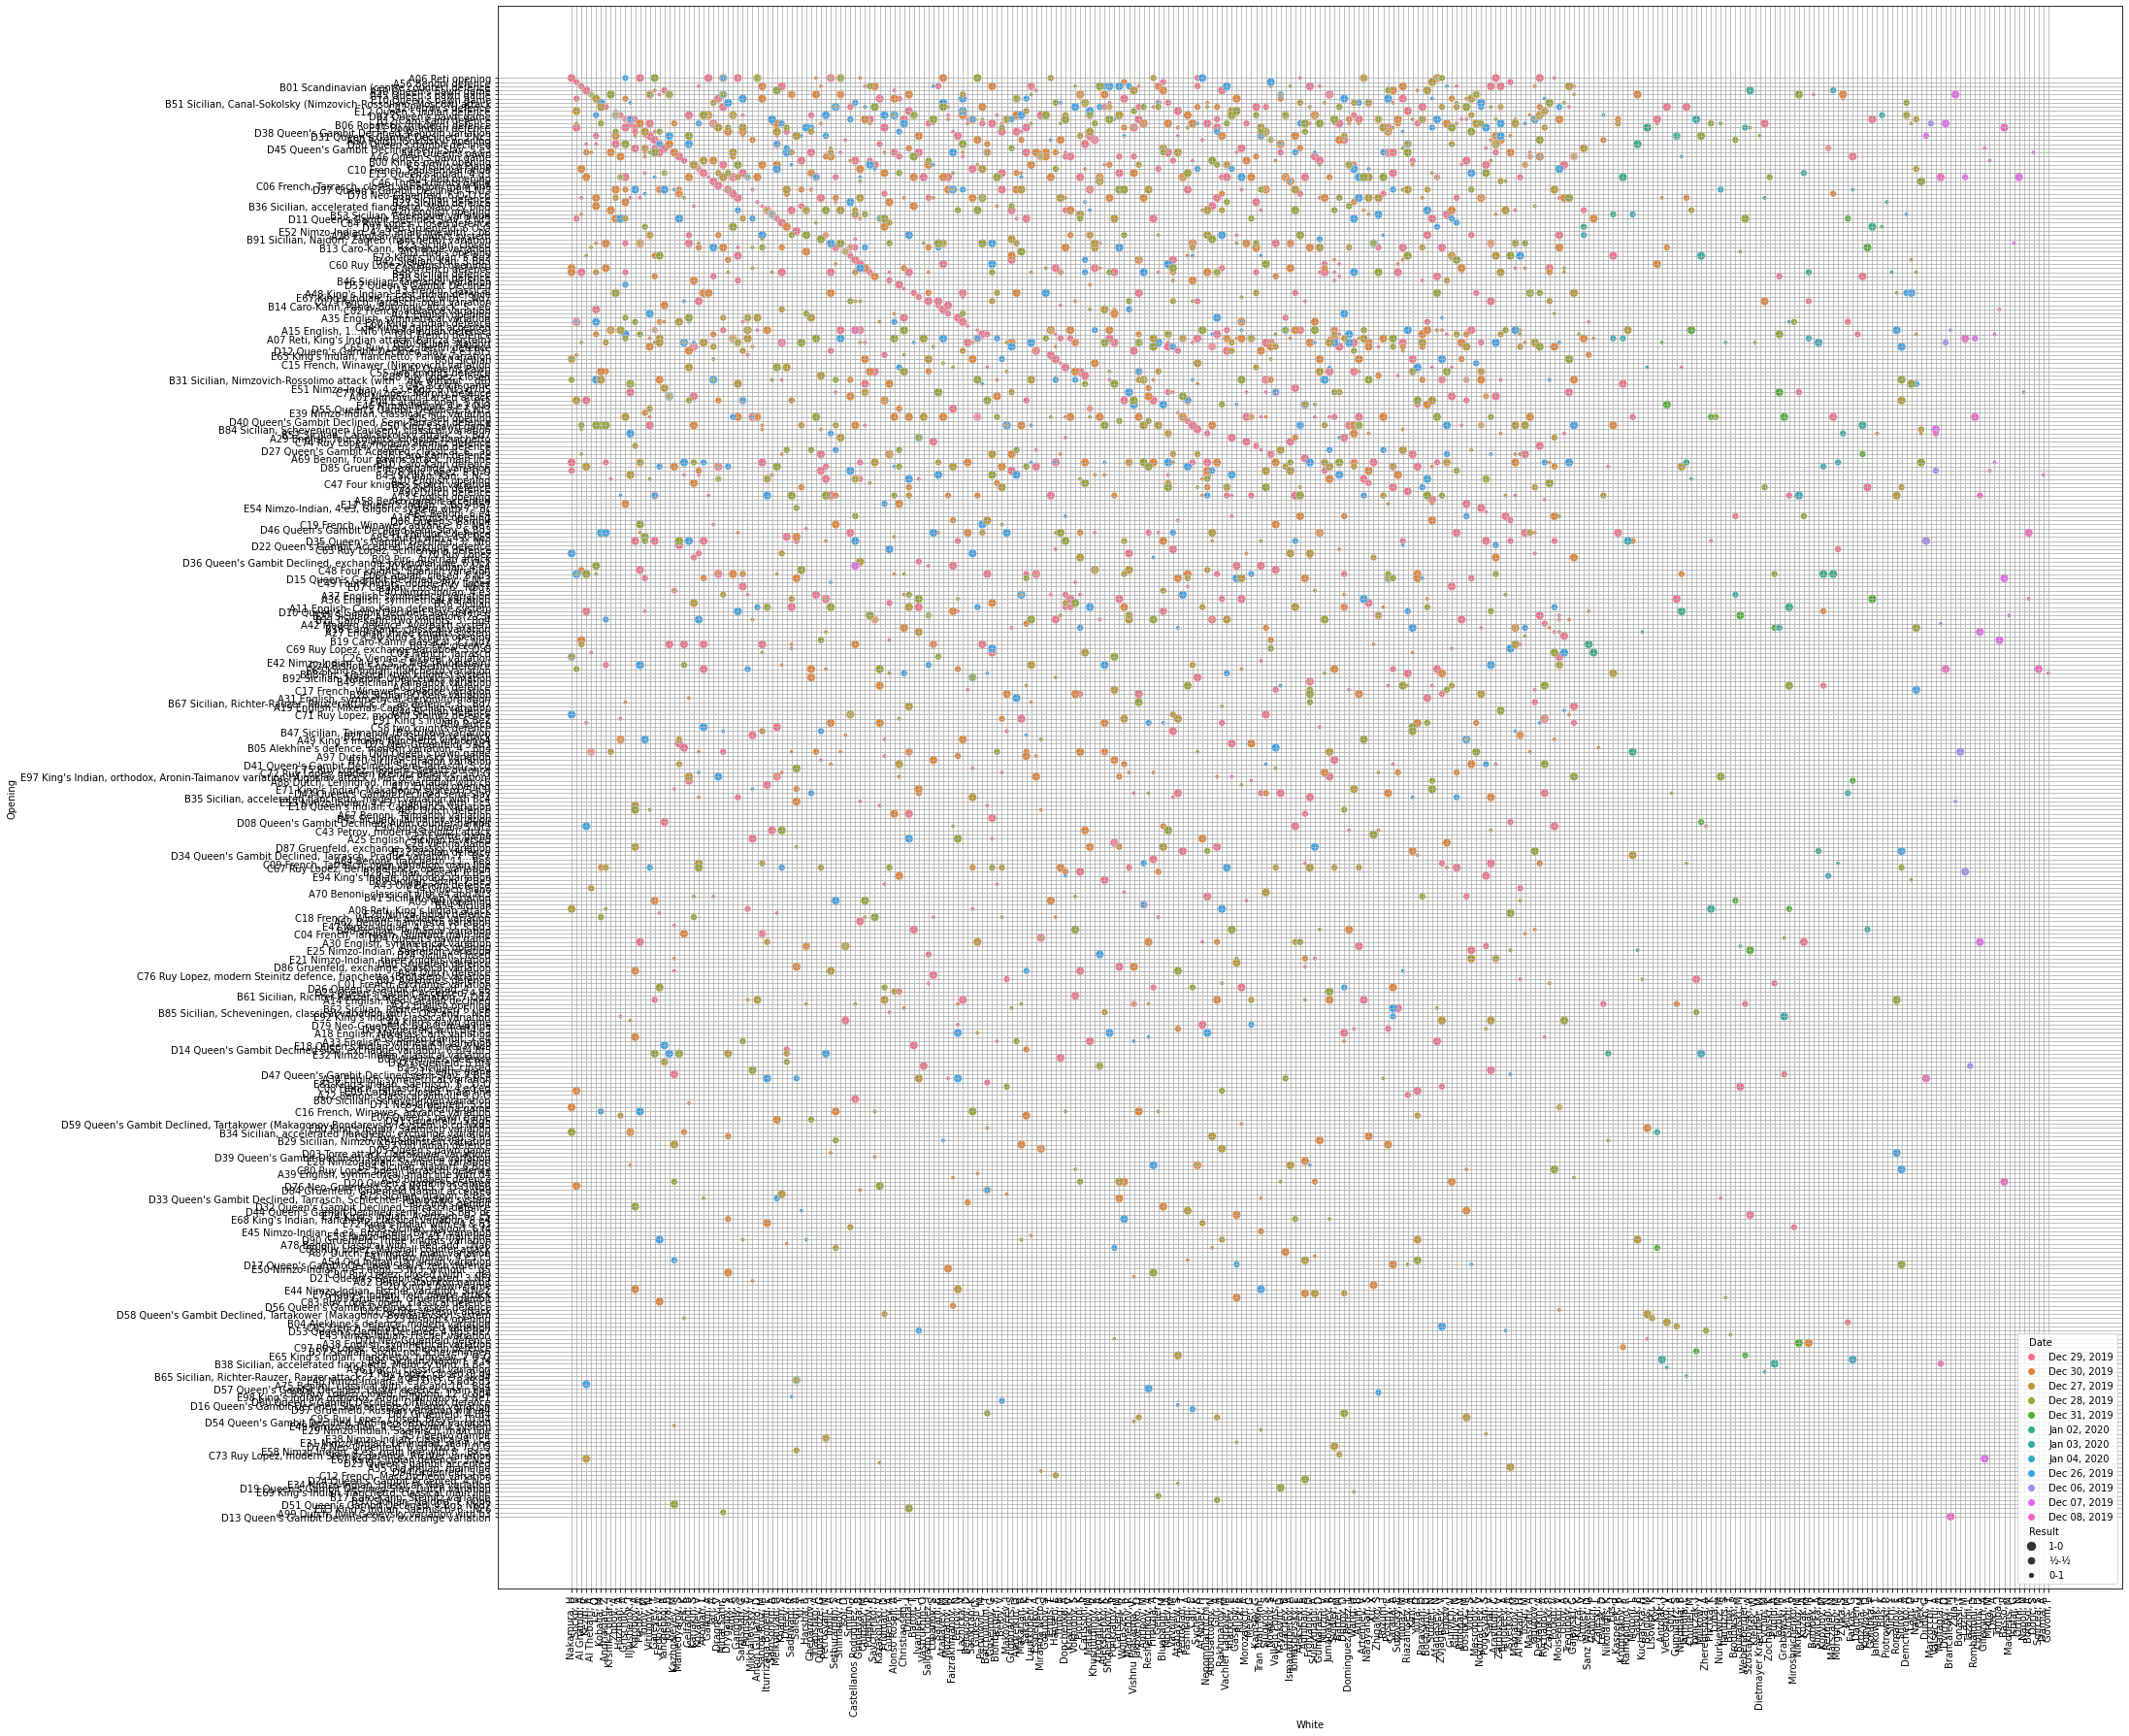

In [21]:
import seaborn as sns
 
plt.figure(figsize=(30,30))
Openings = df.Opening
sns.scatterplot(dataframe_all.White, dataframe_all.Opening, hue=dataframe_all.Date, size=dataframe_all.Result)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [27]:
dataframe_all['Opening'].value_counts()

D02 Queen's pawn game                                   97
B90 Sicilian, Najdorf                                   84
B23 Sicilian, closed                                    80
A05 Reti opening                                        73
A07 Reti, King's Indian attack (Barcza system)          72
                                                        ..
A78 Benoni, classical with ...Re8 and ...Na6             1
E59 Nimzo-Indian, 4.e3, main line                        1
E45 Nimzo-Indian, 4.e3, Bronstein (Byrne) variation      1
A90 Dutch defence                                        1
D13 Queen's Gambit Declined Slav, exchange variation     1
Name: Opening, Length: 349, dtype: int64

<AxesSubplot:>

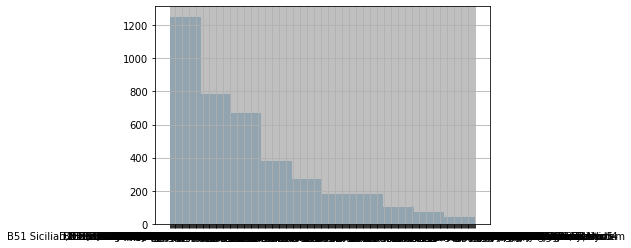

In [32]:
dataframe_all['Opening'].hist()

In [ ]:
dataframe_all.groupby(["Opening"])["A06 Reti Opening"].count().unstack().plot(kind="bar")

In [11]:
import collections

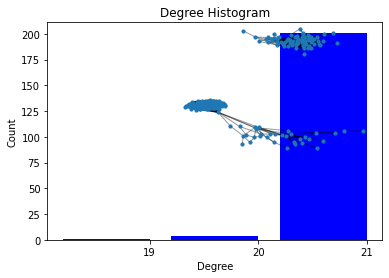

In [134]:
degree_seq = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_seq)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_components(A), key=len, reverse=True)[0]
pos = nx.spring_layout(A)
plt.axis('off')
nx.draw_networkx_nodes(A, pos, node_size=10)
nx.draw_networkx_edges(A, pos, alpha=0.4)

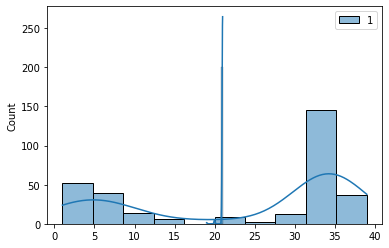

In [133]:
degree = sns.histplot(A.degree(), color='green', kde=True)
degree2 = sns.histplot(G.degree(), color='red', kde=True)

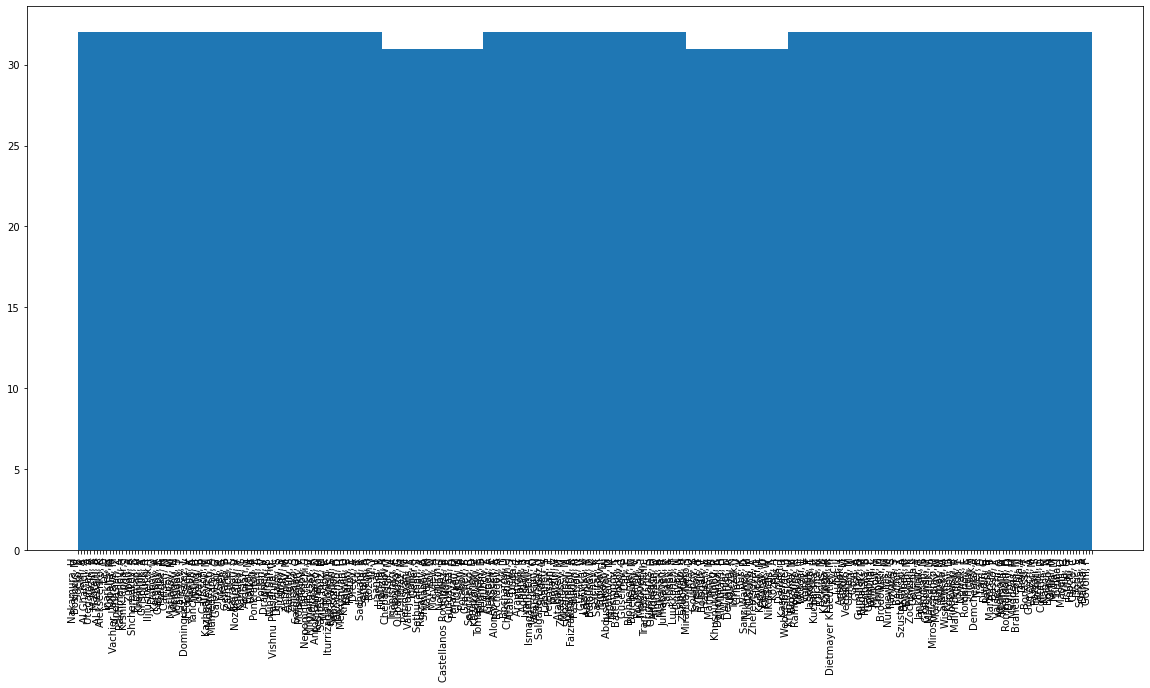

In [154]:
betweenness = nx.betweenness_centrality(A)
plt.figure(figsize=(20,10))
plt.hist(betweenness)
plt.xticks(rotation=90, ha='right')
plt.show()

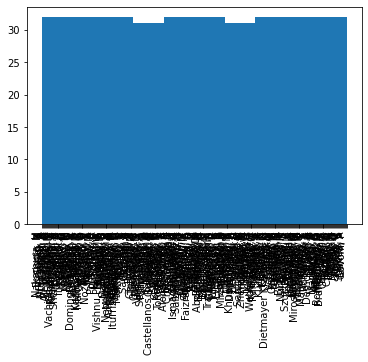

In [150]:
closeness = nx.closeness_centrality(A)
plt.hist(closeness)
plt.xticks(rotation=90, ha='right')
plt.show()

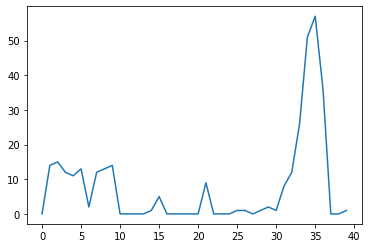

In [100]:
degree = nx.degree_histogram(A)
degree
plt.plot(degree)

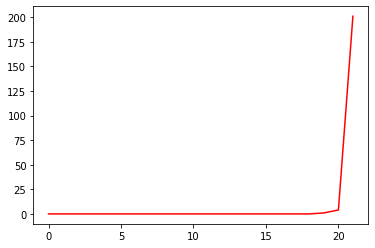

In [104]:
degree_of_first_graph = nx.degree_histogram(G)
degree_of_first_graph
plt.plot(degree_of_first_graph, '-r')

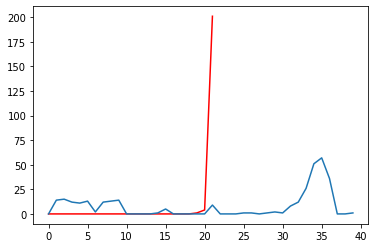

In [105]:
plt.plot(degree_of_first_graph, '-r')
plt.plot(degree)

<AxesSubplot:ylabel='Count'>

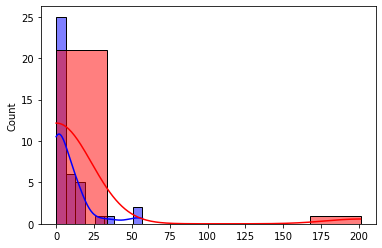

In [119]:
sns.histplot(degree, color='blue', kde=True)
sns.histplot(degree_of_first_graph, color='red', kde=True)

In [17]:
degree_hist = nx.degree(G)
degree_hist

DegreeView({'Nakamura, H': 21, 'Bosiocic, M': 21, 'Socko, B': 21, 'Giri, A': 21, 'Al Ghamdi, A': 21, 'Utegaliyev, A': 21, 'Kezin, R': 21, 'Masrahi, A': 21, 'Al Thebaiti, A': 19, 'Alekseenko, K': 21, 'Le, Q': 21, 'Inarkiev, E': 21, 'Kobalia, M': 21, 'Vachier Lagrave, M': 21, 'Andriasian, Z': 21, 'Rakhmanov, A': 21, 'Krsnik Cohar, I': 21, 'Vidit, S': 21, 'Zubov, A': 21, 'Shcherbakov, R': 21, 'Huzman, A': 21, 'Kramnik, V': 21, 'Grischuk, A': 21, 'Ruck, R': 21, 'Iljiushenok, I': 21, 'Dubov, D': 21, 'Korobov, A': 21, 'Gasanov, E': 21, 'Predke, A': 21, 'Carlsen, M': 21, 'Turov, M': 21, 'Matlakov, M': 21, 'Vitiugov, N': 21, 'Vokhidov, S': 21, 'Gareyev, T': 21, 'Dominguez Perez, L': 21, 'Fedoseev, V': 21, 'Piorun, K': 21, 'Yanchenko, R': 21, 'Wang, H': 21, 'Jobava, B': 21, 'Carlsson, P': 21, 'Kazhgaleyev, M': 21, 'Morozevich, A': 21, 'Mamedyarov, S': 21, 'Gajewski, G': 20, 'Sek, K': 21, 'Meier, G': 21, 'Gelfand, B': 21, 'Zarnicki, P': 21, 'Karjakin, S': 21, 'Nozdrachev, V': 21, 'Kovalev, V': 2

In [121]:
degree_of_second_graph_hist = nx.degree(A)
degree_of_second_graph_hist

DegreeView({'Nakamura, H': 32, 'Bosiocic, M': 35, 'Socko, B': 36, 'Giri, A': 34, 'Al Ghamdi, A': 28, 'Utegaliyev, A': 34, 'Kezin, R': 36, 'Masrahi, A': 26, 'Al Thebaiti, A': 21, 'Alekseenko, K': 36, 'Le, Q': 34, 'Inarkiev, E': 35, 'Kobalia, M': 34, 'Vachier Lagrave, M': 31, 'Andriasian, Z': 35, 'Rakhmanov, A': 35, 'Krsnik Cohar, I': 33, 'Vidit, S': 34, 'Zubov, A': 34, 'Shcherbakov, R': 33, 'Huzman, A': 34, 'Kramnik, V': 21, 'Grischuk, A': 35, 'Ruck, R': 35, 'Iljiushenok, I': 34, 'Dubov, D': 34, 'Korobov, A': 34, 'Gasanov, E': 35, 'Predke, A': 35, 'Carlsen, M': 33, 'Turov, M': 35, 'Matlakov, M': 36, 'Vitiugov, N': 36, 'Vokhidov, S': 36, 'Gareyev, T': 35, 'Dominguez Perez, L': 36, 'Fedoseev, V': 35, 'Piorun, K': 35, 'Yanchenko, R': 36, 'Wang, H': 34, 'Jobava, B': 34, 'Carlsson, P': 33, 'Kazhgaleyev, M': 35, 'Morozevich, A': 21, 'Mamedyarov, S': 31, 'Gajewski, G': 34, 'Sek, K': 34, 'Meier, G': 33, 'Gelfand, B': 35, 'Zarnicki, P': 33, 'Karjakin, S': 33, 'Nozdrachev, V': 35, 'Kovalev, V': 3

In [128]:
first_g = {'diameter': nx.diameter(G),
       'density': nx.density(G)}
second_g = {'diameter': None,
           'density': nx.density(A)}
info = [first_g, second_g]
info

[{'diameter': 3, 'density': 0.10229694529955008},
 {'diameter': None, 'density': 0.07453921393567843}]

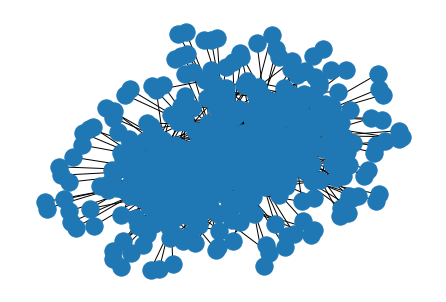

In [49]:
from networkx.algorithms import bipartite
B = nx.Graph()

B.add_nodes_from(df['White'], bipartite=0)
B.add_nodes_from(df['Opening'], bipartite=1)
B.add_weighted_edges_from(
    [(row['White'], row['Opening'], 1) for idx, row in df.iterrows()], 
    weight='Result')
nx.draw(B)

In [36]:
list_of_1950 = ['https://www.365chess.com/tournaments/YUG-USA_m_radio_1950/24860',
               'https://www.365chess.com/tournaments/Saarbruecken_1950/24845',
               'https://www.365chess.com/tournaments/SUI-chB_1950/24844',
                'https://www.365chess.com/tournaments/SUI-ch_1950/24842',
               'https://www.365chess.com/tournaments/SUI-BEL_m_1950/24841',
               'https://www.365chess.com/tournaments/SUI-ARG_m_1950/24840',
               'https://www.365chess.com/tournaments/NED-ch_1950/24838',
               'https://www.365chess.com/tournaments/Moscow-ch_1950/24837',
               'https://www.365chess.com/tournaments/Southsea_1950/24847'
               ]
list_pages = [1,1,1,1,1,1,1,1,1]
df1950=reading(list_of_1950, list_pages, "")
df1950

#ERRORE^^^^^^PERCHèèèèè

,0,1,White,Black,Result,Round,Date,Opening,View
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
47,NaN,NaN,"Bogoljubow, E","Tartakower, S",½-½,10.0,1950.0,"B11 Caro-Kann, two knights, 3...Bg4",NaN
48,NaN,NaN,"Bruce, R","Knight, A",½-½,10.0,1950.0,"A95 Dutch, stonewall with Nc3",NaN
49,NaN,NaN,"Golombek, H","Penrose, J",½-½,10.0,1950.0,E72 King's Indian with e4 & g3,NaN
50,NaN,NaN,"Thomas, A","Schmid, L",0-1,10.0,1950.0,"C18 French, Winawer, advance variation",NaN


In [139]:
cluster_coeff = nx.clustering(A)
cluster_coeff

{'Nakamura, H': 0.20967741935483872,
 'Bosiocic, M': 0.11260504201680673,
 'Socko, B': 0.1761904761904762,
 'Giri, A': 0.19073083778966132,
 'Al Ghamdi, A': 0.2698412698412698,
 'Utegaliyev, A': 0.13012477718360071,
 'Kezin, R': 0.12063492063492064,
 'Masrahi, A': 0.36,
 'Al Thebaiti, A': 0.3952380952380952,
 'Alekseenko, K': 0.14444444444444443,
 'Le, Q': 0.14616755793226383,
 'Inarkiev, E': 0.15294117647058825,
 'Kobalia, M': 0.13725490196078433,
 'Vachier Lagrave, M': 0.2,
 'Andriasian, Z': 0.15630252100840336,
 'Rakhmanov, A': 0.18319327731092436,
 'Krsnik Cohar, I': 0.17803030303030304,
 'Vidit, S': 0.2014260249554367,
 'Zubov, A': 0.1746880570409982,
 'Shcherbakov, R': 0.14583333333333334,
 'Huzman, A': 0.13903743315508021,
 'Kramnik, V': 0.23333333333333334,
 'Grischuk, A': 0.1899159663865546,
 'Ruck, R': 0.12941176470588237,
 'Iljiushenok, I': 0.12299465240641712,
 'Dubov, D': 0.17290552584670232,
 'Korobov, A': 0.1657754010695187,
 'Gasanov, E': 0.14285714285714285,
 'Predke, 

In [140]:
max(cluster_coeff)

'Zylka, S'

<AxesSubplot:ylabel='Count'>

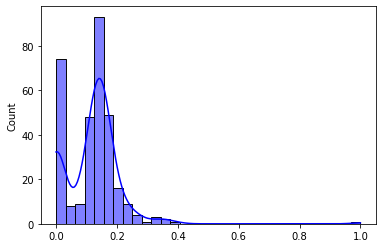

In [151]:
sns.histplot(cluster_coeff, color='blue', kde=True)